<img src="https://miro.medium.com/max/1838/1*hQseRDVLXt2piN_1dfz5pA.jpeg" width="500" height="400">

some times machines can perform better (searching in files, calculation)
<br>sometimes humans are better (language conversion, driving)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [114]:
%matplotlib inline

In [161]:
df = pd.DataFrame({
    'area' : [2600,3000,3200,3600,4000],
    'price' : [550000,565000,610000,720000,725000]
})
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,720000
4,4000,725000


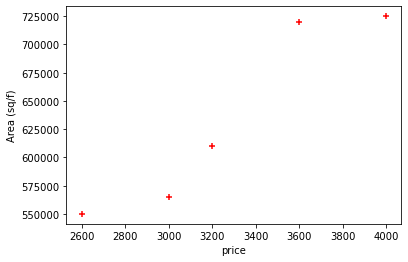

In [116]:
plt.xlabel('price')
plt.ylabel('Area (sq/f)')
plt.scatter(df.area, df.price, color='r', marker='+')  
# By this graph we get to know that this is suitable for LINEAR REGRATION

# Linear Regression
when output is in CONTINUOUS format <br> 
best line fitting so that error should be minimum

In [162]:
reg = linear_model.LinearRegression()       # training model

reg.fit(df[['area']], df.price)   # Xaxis should be 2D array like this [[2600],[3000],[3200],[3600],[4000]]

LinearRegression()

In [164]:
reg.score(df[['area']], df.price)           # checking accuracy 

0.8960585327288432

In [123]:
reg.predict([[3300]])         # AREA as input    # using it after training     # syntax changes for diffeent type of input data

array([636934.93150685, 666284.24657534])

In [121]:
reg.coef_                         # m   # Y = mX + C   

array([146.74657534])

In [122]:
reg.intercept_                    # C   # Y = mX + C

152671.23287671228

In [124]:
# DF to find their prices 
df = pd.DataFrame({
    'area' : [2100,3200,3100,3400,2500],
})
df

,area
0,2100
1,3200
2,3100
3,3400
4,2500


In [127]:
p = reg.predict(df)           # predicting price 

In [128]:
df['Prices'] = p         # creating column & assigning prices in DF
df                       # now we can save it back in new  .csv

,area,Prices
0,2100,460839.041096
1,3200,622260.273973
2,3100,607585.616438
3,3400,651609.589041
4,2500,519537.671233


Now print linear line of regression

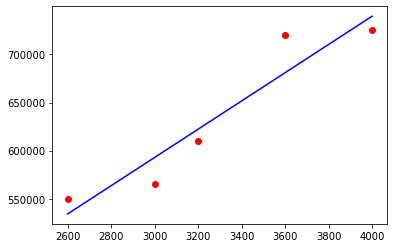

In [132]:
plt.scatter(df.area,df.price, color='r')
plt.plot(df.area,reg.predict(df[['area']]), color='b')

<br>

# using Date for Linear Regration

Linear regression doesn't work on date data. Therefore we need to convert it into numerical value

# Linear Regrassion with Multiple variables  
# ( Multivariate Regression )

In [177]:
df = pd.DataFrame({
    'area' : [2600,3000,3200,3600,4000],
    'bedroom': [3,4,np.NaN,3,5],
    'age' :  [20,15,18,30,8],
    'price' : [550000,565000,610000,595000,760000]
})
df

,area,bedroom,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [178]:
import math
# Data Pre-Processing  /  Data Cleaning     (Handle missing values)
bed_median = math.floor( df.bedroom.median() )        # median is 3.5 so we convert it to 3
df['bedroom'] = df['bedroom'].fillna(bed_median)
df

,area,bedroom,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,3.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [182]:
# price = m1*area + m2*bedroom + m3*age + C
reg = linear_model.LinearRegression()
reg.fit(df[['area', 'bedroom', 'age']], df.price)

LinearRegression()

In [183]:
reg.score(df[['area', 'bedroom', 'age']], df.price)

0.9488817891373804

In [184]:
reg.coef_                   # m1  m2  m3             # price = m1*area + m2*bedroom + m3*age + C

array([   137.25, -26025.  ,  -6825.  ])

In [185]:
reg.intercept_              # C                      # price = m1*area + m2*bedroom + m3*age + C

383724.9999999998

In [186]:
reg.predict([[3000,4,15]])  
# model.predict([ [2600, 3, 20], [3000, 4, 15], [3200, 4, 18] ])  Predicting multiple values

array([589000.])

<br><br>
**calcalus**
<br>*derivative*
<br>*partial derivative*
<br>**
<br>**

<br>

# Cost Function & Gradient descent

**Mean Square Error** $\;\;\;\;\;\;$ ( Cost Function )

<img src='https://i.stack.imgur.com/19Cmk.gif' width="300" height="60" >
<br>

*square all errors -> Sum them -> divided by N(number of points)*

**Gradient descent**<br>
It is algorithm that finds best fit line for given training data set

<br>

**below for have these values**
<br>
<img src="photo.png" width="300" height="300" >

<img src="photo.jpg" width="300" height="300" >

In [187]:
import numpy as np

In [ ]:
def gradient_descent(x, y):
    m_curr = b_curr = 0
    iteration = 1000
    n = len(x)
    learning_rate = 0.001
    
    for i in range(iteration):
        y_predicted = m_curr*x + b_curr
        cost = (1/n) * sum([val**2 for val in (y-y_predicted)])
        m_derivative = -(2/n)*sum(x*(y-y_predicted)) 
        b_derivative = -(2/n)*sum((y-y_predicted)) 
        
        m_curr = m_curr - (learning_rate*m_derivative)
        b_curr = b_curr - (learning_rate*b_derivative)
        
        print("m: {}, b: {}, cost: {}, iteration: {}".format(m_curr,b_curr,cost,i))
        # first check forwhich values of learning rate COST changes from Decreasing to Increasing
        # then increase iteration for better result
        

x = np.array([1,2,3,4,5])
y = np.array([5,7,9,11,13])

gradient_descent(x, y)

# Save and Load trained model using
### 1) pickle <br>2) sklearn joblib

In [193]:
df

,area,bedroom,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,3.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [194]:
# Training a model
model = linear_model.LinearRegression()
model.fit(df[['area', 'bedroom', 'age']], df.price)

LinearRegression()

In [195]:
model.coef_  

array([   137.25, -26025.  ,  -6825.  ])

In [196]:
model.intercept_

383724.9999999998

In [198]:
model.predict([[5000 , 5 , 8]])

array([885250.])

In [199]:
# Save model
import pickle

In [200]:
with open('model_pickle', 'wb') as f:         # it create a module 'model_pickle' and saves model in it   # write binary mode
    pickle.dump(model,f)

In [205]:
with open('model_pickle', 'rb') as f:         # opening model in read binary mode
    model = pickle.load(f)                    # load model 

In [206]:
model.predict([[5000 , 5 , 8]])

array([885250.])

### joblib
*if our model have large numpy array then use joblib*

In [216]:
from sklearn.externals import joblib

ImportError: cannot import name 'joblib' from 'sklearn.externals' (C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\__init__.py)

In [217]:
import joblib          # if previous import not work use this

In [218]:
joblib.dump(model,'model_joblib')

['model_joblib']

In [219]:
mj = joblib.load('model_joblib')

In [220]:
mj.predict([[5000 , 5 , 8]])

array([885250.])

<br>


### categorial

In [99]:
# handle TEXT data in numeric model
df = pd.DataFrame({
    'city' : ['delhi', 'delhi', 'delhi', 'delhi', 'pune', 'pune', 'pune', 'pune', 'mumbai', 'mumbai', 'mumbai', 'mumbai'],
    'area' : [  2600 ,  3000  ,  3200  ,  3400  ,  3600 ,  4000 ,  2600 ,  3000 ,   3400  ,   3200  ,   3600  ,   4000  ],
    'price': [ 550000, 778000, 610000 , 720000 , 725000, 550000, 565000, 610000,  720000 ,  660000  ,  725000 ,   700000]
})
df

,city,area,price
0,delhi,2600,550000
1,delhi,3000,778000
2,delhi,3200,610000
3,delhi,3400,720000
4,pune,3600,725000
5,pune,4000,550000
6,pune,2600,565000
7,pune,3000,610000
8,mumbai,3400,720000
9,mumbai,3200,660000


if we encode name of cities as numbers (delhi=1 pune=2 mumbai=3) model can consider them like small and big<br>
(pune>delhi) which makes no sense

**Categorical variable**
1) Nominal  (city_name , Gender)     $\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:$ 2) ordinal $\:\:\:$(high_medium_low , rating(good better best) )

#### Get Dummy

In [223]:
# add dummy variables
dumies = pd.get_dummies(df.city)
dumies

,delhi,mumbai,pune
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,0,0,1
5,0,0,1
6,0,0,1
7,0,0,1
8,0,1,0
9,0,1,0


In [225]:
merged = pd.concat([df, dumies], axis='columns')
merged

,city,area,price,delhi,mumbai,pune
0,delhi,2600,550000,1,0,0
1,delhi,3000,778000,1,0,0
2,delhi,3200,610000,1,0,0
3,delhi,3400,720000,1,0,0
4,pune,3600,725000,0,0,1
5,pune,4000,550000,0,0,1
6,pune,2600,565000,0,0,1
7,pune,3000,610000,0,0,1
8,mumbai,3400,720000,0,1,0
9,mumbai,3200,660000,0,1,0


In [ ]:
#****************   DROP ONE OF THE DUMMY COLUMN  ( TO PREVENT FROM MULTI COLINEARITY )

In [228]:
final = merged.drop(['city', 'pune'], axis='columns')          # dont need city column now
final

,area,price,delhi,mumbai
0,2600,550000,1,0
1,3000,778000,1,0
2,3200,610000,1,0
3,3400,720000,1,0
4,3600,725000,0,0
5,4000,550000,0,0
6,2600,565000,0,0
7,3000,610000,0,0
8,3400,720000,0,1
9,3200,660000,0,1


In [229]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [231]:
x = final.drop('price', axis=1)
x

,area,delhi,mumbai
0,2600,1,0
1,3000,1,0
2,3200,1,0
3,3400,1,0
4,3600,0,0
5,4000,0,0
6,2600,0,0
7,3000,0,0
8,3400,0,1
9,3200,0,1


In [233]:
y = final.price
y

0     550000
1     778000
2     610000
3     720000
4     725000
5     550000
6     565000
7     610000
8     720000
9     660000
10    725000
11    700000
Name: price, dtype: int64

In [234]:
model.fit(x,y)

LinearRegression()

In [235]:
model.predict([[5000, 1, 0]])                        # 1 0 means delhi       # 0 1 means mumbai   # 0 0 means pune

array([762366.93548387])

### Label Encoding

First use label encoding on categorical Data then apply one-Hot Encoding on them

In [98]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [100]:
df_le = df
le.fit_transform(df_le.city)                       #  delhi = 0     mumbai = 2     pune = 1

array([0, 0, 0, 0, 2, 2, 2, 2, 1, 1, 1, 1])

In [101]:
df_le.city=le.fit_transform(df_le.city)
df_le

,city,area,price
0,0,2600,550000
1,0,3000,778000
2,0,3200,610000
3,0,3400,720000
4,2,3600,725000
5,2,4000,550000
6,2,2600,565000
7,2,3000,610000
8,1,3400,720000
9,1,3200,660000


In [102]:
x = df_le[['city', 'area']].values
x

array([[   0, 2600],
       [   0, 3000],
       [   0, 3200],
       [   0, 3400],
       [   2, 3600],
       [   2, 4000],
       [   2, 2600],
       [   2, 3000],
       [   1, 3400],
       [   1, 3200],
       [   1, 3600],
       [   1, 4000]], dtype=int64)

In [103]:
y=df_le.price
y

0     550000
1     778000
2     610000
3     720000
4     725000
5     550000
6     565000
7     610000
8     720000
9     660000
10    725000
11    700000
Name: price, dtype: int64

#### One Hot Encoding
*to deal with nominal categorical variable*

In [108]:
# from sklearn.preprocessing import OneHotEncoder
# ohe = OneHotEncoder(categorical_features=[0])  
# x = ohe.fit_transform(x).toarray()
# x
# **********     IF THIS DONT WORK   ***********************

# OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ohe = ColumnTransformer([('encoder', OneHotEncoder(), [0])],     remainder='passthrough')
x = ohe.fit_transform(x)
x

array([[0.0e+00, 1.0e+00, 0.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 0.0e+00, 3.0e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 0.0e+00, 3.2e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 0.0e+00, 3.4e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 1.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 1.0e+00, 4.0e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 1.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 1.0e+00, 3.0e+03],
       [1.0e+00, 0.0e+00, 1.0e+00, 0.0e+00, 3.4e+03],
       [1.0e+00, 0.0e+00, 1.0e+00, 0.0e+00, 3.2e+03],
       [1.0e+00, 0.0e+00, 1.0e+00, 0.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 1.0e+00, 0.0e+00, 4.0e+03]])

In [109]:
# Drop 1 column
x = x[:,1:]       # Drops zeroth column
x

array([[1.0e+00, 0.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.0e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.2e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.4e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.6e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 4.0e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.0e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.4e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.2e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 4.0e+03]])

In [110]:
model.fit(x, y)

LinearRegression()

In [111]:
model.predict([[1,0,0,2800]])          # 1,0,0 Means Delhi

array([651952.95698913])

# Split Dataset into Training & Test dataset

In [151]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [152]:
df = pd.DataFrame({
    'area' : [  2600 ,  3000  ,  3200  ,  3400  ,  3600 ,  4000 ,  2600 ,  3000 ,   3400  ,   3200  ,   3600  ,   4000  ],
    'price': [ 550000, 778000 , 610000 , 720000 , 725000, 550000, 565000, 610000,  720000 ,  660000 ,  725000 ,   700000]
})
df

,area,price
0,2600,550000
1,3000,778000
2,3200,610000
3,3400,720000
4,3600,725000
5,4000,550000
6,2600,565000
7,3000,610000
8,3400,720000
9,3200,660000


In [153]:
x = np.array(df.area).reshape(-1,1)            # *******************************************
y = df.price

In [154]:
x

array([[2600],
       [3000],
       [3200],
       [3400],
       [3600],
       [4000],
       [2600],
       [3000],
       [3400],
       [3200],
       [3600],
       [4000]], dtype=int64)

In [155]:
y

0     550000
1     778000
2     610000
3     720000
4     725000
5     550000
6     565000
7     610000
8     720000
9     660000
10    725000
11    700000
Name: price, dtype: int64

In [156]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2) 
# 20% is for test data  # we get 4 parameter in return  # on every reRun it choose random samples 
# use   random_state=10   as attribute to produce always same set of data

In [157]:
x_train 

array([[3400],
       [2600],
       [3000],
       [3600],
       [3600],
       [4000],
       [2600],
       [3200],
       [4000]], dtype=int64)

In [158]:
y_train

3     720000
0     550000
1     778000
10    725000
4     725000
5     550000
6     565000
2     610000
11    700000
Name: price, dtype: int64

In [159]:
x_test

array([[3000],
       [3400],
       [3200]], dtype=int64)

In [160]:
y_test

7    610000
8    720000
9    660000
Name: price, dtype: int64

In [162]:
model.fit(x_train, y_train)

LinearRegression()

In [163]:
model.predict(x_test)

array([641791.66666667, 661375.        , 651583.33333333])

In [164]:
model.score(x_test, y_test)           # accuracy is 25%

0.2552020375457882

# Logistic Regration

use to solve **classification problem**<br>
Predicted value is CATEGORICAL <br>
event existing such as pass/fail, win/lose, alive/dead or healthy/sick , email span YES/NO  , buy or not $\:\:\:$  #BINARY Classifiation <br> 
image contains a cat, dog, lion   $\:\:\:$  # MULTICLASS Classifiation


#### use Logistic regression on Binary classification problem

**Sigmoid or Logit Function**
<img src="1.jpg" width="300" height="300" >
<br>
e = Euler's Number (2.71828) <br>
Sigmoid Function converts input into  ( 0 TO 1 ) <br>
As we know that $\:\:\:\:\:$  Y = mX + C
<img src="https://rajputhimanshu.files.wordpress.com/2018/03/linear_vs_logistic_regression.jpg" width="700" height="400" >

## Binary Classification

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [172]:
df = pd.DataFrame({
    'age' : [20,15,22,34,42,32,33,28,29,65,67,69,63,65,59,60,99],
    'insurance' : [0,0,0,1,0,0,0,0,0,1,1,1,1,0,1,1,1]
})
df.head()

,age,insurance
0,20,0
1,15,0
2,22,0
3,34,1
4,42,0


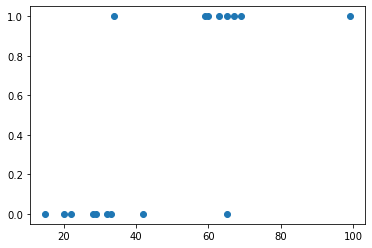

In [171]:
plt.scatter(df.age, df.insurance)

In [173]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['age']], df.insurance, test_size=0.1)

In [174]:
X_test

,age
3,34
12,63


In [176]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [178]:
model.fit(X_train, y_train)

LogisticRegression()

In [180]:
model.predict(X_test)

array([0, 1], dtype=int64)

In [181]:
model.score(X_test,y_test)        # model is 50% accurate

0.5

In [182]:
model.predict_proba(X_test)              # person with age 34     0.98219087 not buy

array([[0.98219087, 0.01780913],
       [0.19877037, 0.80122963]])

#### use Logistic regression on Multiclass classification problem

**Hand Written digits Recognition**

In [184]:
from sklearn.datasets import load_digits
digits = load_digits()

In [185]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [186]:
digits.data[0]                                # Printing one Digit from DataSet

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 432x288 with 0 Axes>

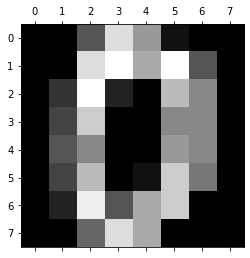

In [223]:
plt.gray()
plt.matshow(digits.images[0])

In [188]:
digits.target[0:5]                          # Printing answers of 1st five elements in List

array([0, 1, 2, 3, 4])

In [190]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2)

In [191]:
len(X_train)

1437

In [192]:
len(X_test)

360

In [193]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [194]:
model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [196]:
model.score(X_test, y_test)

0.9694444444444444

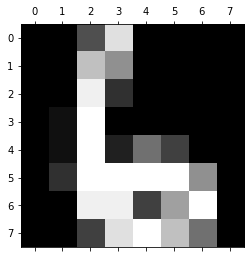

In [197]:
plt.matshow(digits.images[67])

In [198]:
digits.target[67]

6

In [200]:
model.predict([digits.data[67]])

array([6])

In [202]:
model.predict(digits.data[0:5])          # predicting list

array([0, 1, 2, 3, 4])

In [203]:
y_predicted = model.predict(X_test)
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predicted)
cm

array([[32,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0, 41,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 27,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 32,  0,  2,  0,  1,  1,  0],
       [ 0,  0,  0,  0, 34,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 33,  1,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 35,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 34,  0,  0],
       [ 0,  1,  0,  0,  1,  0,  0,  0, 33,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1, 48]], dtype=int64)

Text(69.0, 0.5, 'Truth')

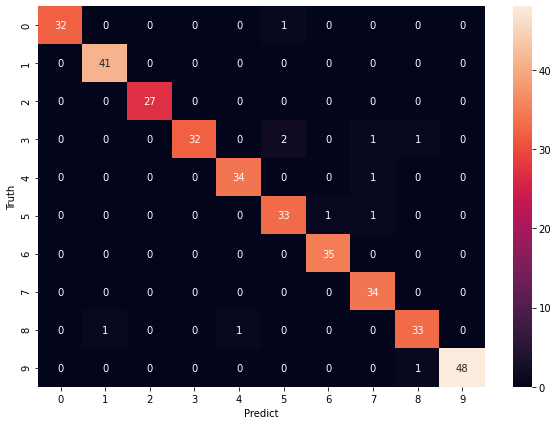

In [206]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predict')
plt.ylabel('Truth')

## Logstic Regression using Decision Tree

**if we cann't split data in 2 part (by single line) we need to make more parts of Data** 

*While selectiong ordering of features check for less **Randomness**(entropy)*

In [1]:
import pandas as pd
df = pd.read_csv('new.csv')
df

,company,job,degree,salary_more_then_100k
0,google,sales,btech,0
1,google,sales,mtech,0
2,google,business,btech,1
3,google,business,mtech,1
4,google,computer,btech,0
5,google,computer,mtech,1
6,amazon,sales,mtech,0
7,amazon,computer,btech,0
8,amazon,business,btech,0
9,amazon,business,mtech,1


In [2]:
inputs = df.drop('salary_more_then_100k', axis='columns')
target = df['salary_more_then_100k']

In [3]:
from sklearn.preprocessing import LabelEncoder

In [4]:
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

In [8]:
inputs['company_n'] = le_company.fit_transform(inputs['company'])
inputs['job_n'] = le_job.fit_transform(inputs['job'])
inputs['degree_n'] = le_degree.fit_transform(inputs['degree'])
inputs.head()

,company,job,degree,company_n,job_n,degree_n
0,google,sales,btech,2,2,0
1,google,sales,mtech,2,2,1
2,google,business,btech,2,0,0
3,google,business,mtech,2,0,1
4,google,computer,btech,2,1,0


In [10]:
inputs_n = inputs.drop(['company', 'job', 'degree'], axis='columns')
inputs_n

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [11]:
from sklearn import tree

In [12]:
model = tree.DecisionTreeClassifier()

In [13]:
model.fit(inputs_n, target)

DecisionTreeClassifier()

In [14]:
model.score(inputs_n, target)

1.0

In [15]:
model.predict([[2,2,1]])

array([0], dtype=int64)

# SVM (Sopport Vector Machine)

**when we want to draw classification boundry in scatter plot we have many possible ways to draw it**<br>
so to select best boundry :- Take nearby Data Points and find distance between line & point , and the line with maximum square sum of distance will be best option<br>
*these nearby Data Points are called support vectors*

SVM draws a hyper plane in N-Dimensional space such that it maximizes margin between classification groups

### Gamma & Regularization

High Gamma : consider only few nearer DataPoints to calculate Dist  (more accuracy poor computation)<br>
low Gamma  : consider many DataPoints  (less accuracy but good at computation)
<img src="21.jpg" width="300" height="300" >

 Low Regularization : straight boundry considering some errors (Better)
High Regularization : zig-zag line but no error
<img src="22.jpg" width="300" height="300" >

if in some case it is difficult to Draw Boundry then we can introduce a new plane & draw boundry there 
this new introduced plane called KERNEL
<img src="3.jpg" width="400" height="400" >

In [4]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [5]:
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [6]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [11]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [10]:
df=pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [13]:
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [14]:
df['flower_name']=df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [15]:
from matplotlib import pyplot as plt

In [ ]:
%matplotlib inline

In [17]:
df0=df[df.target==0]
df1=df[df.target==1]
df2=df[df.target==2]

In [18]:
df0.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [19]:
df1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


In [20]:
df2.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
100,6.3,3.3,6.0,2.5,2,virginica
101,5.8,2.7,5.1,1.9,2,virginica
102,7.1,3.0,5.9,2.1,2,virginica
103,6.3,2.9,5.6,1.8,2,virginica
104,6.5,3.0,5.8,2.2,2,virginica


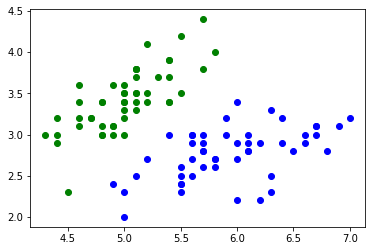

In [22]:
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color='g')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color='b')

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x = df.drop(['target', 'flower_name'], axis='columns')

In [25]:
y=df.target

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [33]:
from sklearn.svm import SVC
model = SVC()
# model = SVC(C=10)               # default C=1    # we increase regularisation in this case
# model = SVC(gamma=100)          # default gamma = 'auto'
# model = SVC(kernel='linear')    # default kernel='rbf'

In [30]:
model.fit(x_train, y_train)

SVC()

In [31]:
model.score(x_test, y_test)

0.9666666666666667

# Random Forest Algorithm

In [176]:
import pandas as pd
from sklearn.datasets import load_digits
digits = load_digits()

In [178]:
%matplotlib inline
import matplotlib.pyplot as plt

In [177]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

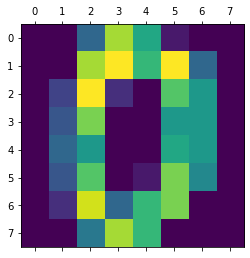

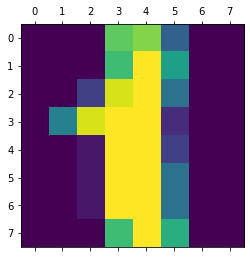

In [179]:
for i in range(2):
    plt.matshow(digits.images[i])

<Figure size 432x288 with 0 Axes>

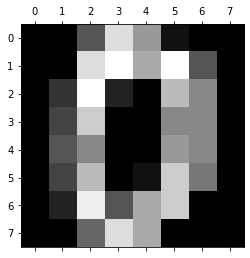

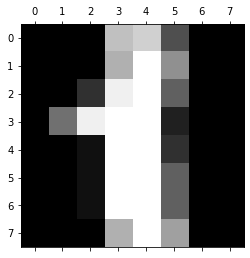

In [180]:
plt.gray() 
for i in range(2):
    plt.matshow(digits.images[i])

In [181]:
df = pd.DataFrame(digits.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [182]:
df['target'] = digits.target

In [183]:
df[0:12]

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
5,0.0,0.0,12.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,9.0,16.0,16.0,10.0,0.0,0.0,5
6,0.0,0.0,0.0,12.0,13.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,9.0,15.0,11.0,3.0,0.0,6
7,0.0,0.0,7.0,8.0,13.0,16.0,15.0,1.0,0.0,0.0,...,0.0,0.0,0.0,13.0,5.0,0.0,0.0,0.0,0.0,7
8,0.0,0.0,9.0,14.0,8.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,11.0,16.0,15.0,11.0,1.0,0.0,8
9,0.0,0.0,11.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,9.0,12.0,13.0,3.0,0.0,0.0,9


**Train and the model and prediction**

In [184]:
X = df.drop('target',axis='columns')
y = df.target

In [185]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [186]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=20)  # Number of random trees to generate
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

In [187]:
model.score(X_test, y_test)

0.9694444444444444

In [188]:
y_predicted = model.predict(X_test)

### Confusion Matrix

In [189]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[40,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 42,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 26,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  1,  1, 20,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 33,  0,  0,  1,  0,  1],
       [ 0,  0,  0,  0,  0, 40,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 39,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 35,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1, 36,  0],
       [ 0,  0,  0,  2,  0,  0,  0,  0,  1, 38]], dtype=int64)

Text(69.0, 0.5, 'Truth')

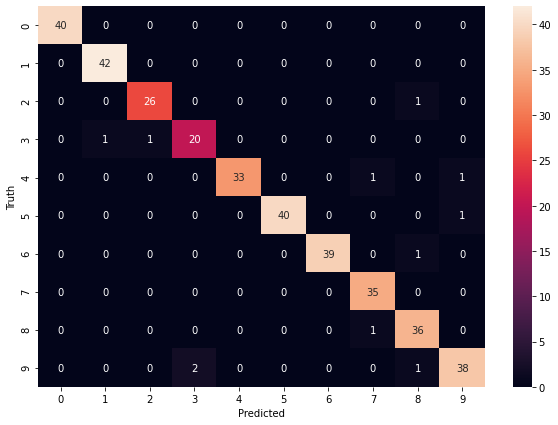

In [190]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# K-Fold CROSS VALIDATION

we can use different ML model to train our deta <br>
but to know which model will be good for our dataset we use K-Fold CROSS VALIDATION

some train_test_split divide dataset into same kind (EX: same type of data into test part) <br>
in such situation Kfold cross validation helps <br>
train_test_split gives different score for different split of dataset

in this technique we divide the dataset into n_folds & take different folds for test part in different iteration <br>
and average of all iteration is our final score

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
digits = load_digits()

*Demonstartion of how train_test_split gives different score with change of data*

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target,test_size=0.3)

**Logistic Regression**

In [3]:
lr = LogisticRegression(solver='liblinear',multi_class='ovr')
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.9333333333333333

**SVM**

In [4]:
svm = SVC(gamma='auto')
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.45925925925925926

**Random Forest**

In [5]:
rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9685185185185186

#### KFold cross validation

Basic example

In [6]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3)
kf

KFold(n_splits=3, random_state=None, shuffle=False)

In [7]:
# kf.split gives 2D array of n ROWS & 2 ARRAY_COLUMNS  
for train_index, test_index in kf.split([1,2,3,4,5,6,7,8,9]):  # different folds on different iteration   
    print(train_index, test_index)

[3 4 5 6 7 8] [0 1 2]
[0 1 2 6 7 8] [3 4 5]
[0 1 2 3 4 5] [6 7 8]


**Use KFold for our digits example**

In [8]:
# parameter= ModelName & 4Dataset
# return score of that model
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [9]:
get_score(SVC(),X_train, X_test, y_train, y_test)

0.987037037037037

In [10]:
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=3)   # similar to K-Fold But it only make fold of shuffeled Data

scores_logistic = []
scores_svm = []
scores_rf = []

for train_index, test_index in folds.split(digits.data,digits.target):
    X_train, X_test, y_train, y_test = digits.data[train_index], digits.data[test_index], \
                                       digits.target[train_index], digits.target[test_index]
    scores_logistic.append(get_score(LogisticRegression(solver='liblinear',multi_class='ovr'), X_train, X_test, y_train, y_test))  
    scores_svm.append(get_score(SVC(gamma='auto'), X_train, X_test, y_train, y_test))
    scores_rf.append(get_score(RandomForestClassifier(n_estimators=40), X_train, X_test, y_train, y_test))

In [11]:
scores_logistic

[0.8948247078464107, 0.9532554257095158, 0.9098497495826378]

In [12]:
scores_svm

[0.3806343906510851, 0.41068447412353926, 0.5125208681135225]

In [13]:
scores_rf

[0.9165275459098498, 0.9532554257095158, 0.9131886477462438]

### cross_val_score function

In [14]:
from sklearn.model_selection import cross_val_score

Logistic regression model performance using cross_val_score

In [15]:
cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), digits.data, digits.target,cv=3)

array([0.89482471, 0.95325543, 0.90984975])

**svm model performance using cross_val_score**

In [16]:
cross_val_score(SVC(gamma='auto'), digits.data, digits.target,cv=3)

array([0.38063439, 0.41068447, 0.51252087])

**random forest performance using cross_val_score**

In [17]:
cross_val_score(RandomForestClassifier(n_estimators=40),digits.data, digits.target,cv=3)

array([0.92654424, 0.94323873, 0.93322204])

cross_val_score uses stratifield kfold by default

### Parameter tunning using k fold cross validation

In [18]:
scores1 = cross_val_score(RandomForestClassifier(n_estimators=5),digits.data, digits.target, cv=10)
np.average(scores1)

0.8792396027312229

In [19]:
scores2 = cross_val_score(RandomForestClassifier(n_estimators=20),digits.data, digits.target, cv=10)
np.average(scores2)

0.9376505276225947

In [20]:
scores3 = cross_val_score(RandomForestClassifier(n_estimators=30),digits.data, digits.target, cv=10)
np.average(scores3)

0.9337709497206704

In [21]:
scores4 = cross_val_score(RandomForestClassifier(n_estimators=40),digits.data, digits.target, cv=10)
np.average(scores4)

0.946576660459342

Here we used cross_val_score to fine tune our random forest classifier and figured that having around 40 trees in random forest gives best result

# Clustering With K Means 

K = its meaning number of clusters to form

In [16]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [19]:
df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0, 0.5, 'Income($)')

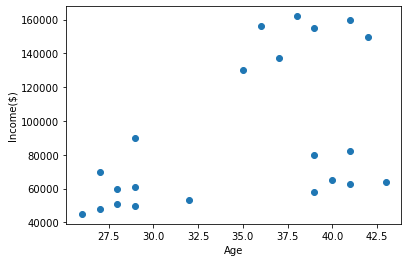

In [20]:
plt.scatter(df.Age,df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')

In [21]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])   ####### fit_predict did both work 
y_predicted

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [22]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


In [23]:
km.cluster_centers_       # co ordinates of centroids

array([[3.40000000e+01, 8.05000000e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.29090909e+01, 5.61363636e+04]])

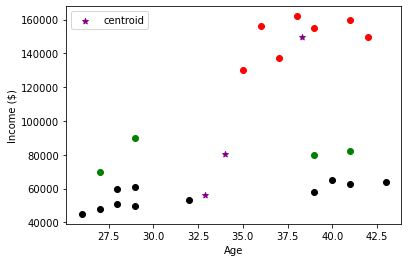

In [24]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

as scaling of X & Y axis are different  thats why such wrong output is occuring

**Preprocessing using min max scaler**

In [25]:
scaler = MinMaxScaler()

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [26]:
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1


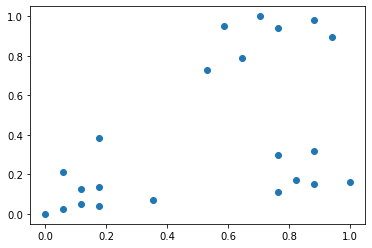

In [27]:
plt.scatter(df.Age,df['Income($)'])

In [28]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [29]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


In [30]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

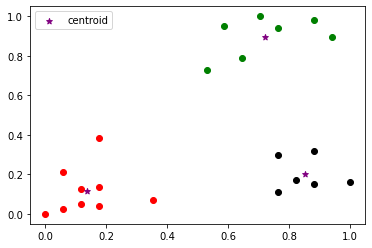

In [31]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

**Elbow Plot**

In [32]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


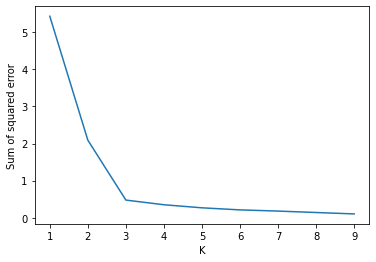

In [33]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)
# this graph shows error value for different value of K

as elbow shape is coming on K=3 it shows that k=3 is good value for fitting model

# Naive Bayes

**Bernoulli Naive Bayes** : It assumes that all our features are binary such that they take only two values. Means 0s can represent “word does not occur in the document” and 1s as "word occurs in the document" .

**Multinomial Naive Bayes** : Its is used when we have discrete data (e.g. movie ratings ranging 1 and 5 as each rating will have certain frequency to represent). In text learning we have the count of each word to predict the class or label.

**Gaussian Naive Bayes** : Because of the assumption of the normal distribution, Gaussian Naive Bayes is used in cases when all our features are continuous. For example in Iris dataset features are sepal width, petal width, sepal length, petal length. So its features can have different values in data set as width and length can vary. We can’t represent features in terms of their occurrences. This means data is continuous. Hence we use Gaussian Naive Bayes here.

# Naive Bayes  (Predicting survival from titanic crash)

**Finding Probability of perticular event**

In [22]:
import pandas as pd

In [23]:
df = pd.read_csv("titanic.csv")
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


In [25]:
df.shape

(891, 10)

In [26]:
df.drop(['Name','SibSp','Parch','Cabin','Embarked'],axis='columns',inplace=True)
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [27]:
inputs = df.drop('Survived',axis='columns')
target = df.Survived

In [28]:
#inputs.Sex = inputs.Sex.map({'male': 1, 'female': 2})

dummies = pd.get_dummies(inputs.Sex)
dummies.head(3)

,female,male
0,0,1
1,1,0
2,1,0


In [29]:
inputs = pd.concat([inputs,dummies],axis='columns')   # to join 2 DF
inputs.head(3)

,Pclass,Sex,Age,Fare,female,male
0,3,male,22.0,7.2500,0,1
1,1,female,38.0,71.2833,1,0
2,3,female,26.0,7.9250,1,0


drop any one column to save from 'dummy variable trap theory'

In [30]:
inputs.drop(['Sex','male'],axis='columns',inplace=True)
inputs.head(3)

,Pclass,Age,Fare,female
0,3,22.0,7.2500,0
1,1,38.0,71.2833,1
2,3,26.0,7.9250,1


In [31]:
inputs.columns[inputs.isna().any()]    # is there any NA value in any column

Index(['Age'], dtype='object')

In [32]:
inputs.Age[:10]

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [33]:
inputs.Age = inputs.Age.fillna(inputs.Age.mean())
inputs.head()

,Pclass,Age,Fare,female
0,3,22.0,7.2500,0
1,1,38.0,71.2833,1
2,3,26.0,7.9250,1
3,1,35.0,53.1000,1
4,3,35.0,8.0500,0


In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs,target,test_size=0.3)

### GaussianNB

In [35]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [36]:
model.fit(X_train,y_train)

GaussianNB()

In [37]:
model.score(X_test,y_test)

0.7835820895522388

In [38]:
X_test[0:10]

,Pclass,Age,Fare,female
670,2,40.000000,39.0000,1
285,3,33.000000,8.6625,0
421,3,21.000000,7.7333,0
649,3,23.000000,7.5500,1
300,3,29.699118,7.7500,1
158,3,29.699118,8.6625,0
885,3,39.000000,29.1250,1
533,3,29.699118,22.3583,1
722,2,34.000000,13.0000,0
477,3,29.000000,7.0458,0


In [39]:
y_test[0:10]

670    1
285    0
421    0
649    1
300    1
158    0
885    0
533    1
722    0
477    0
Name: Survived, dtype: int64

In [40]:
model.predict(X_test[0:10])

array([1, 0, 0, 1, 1, 0, 1, 1, 0, 0], dtype=int64)

In [41]:
model.predict_proba(X_test[:10])     # Predicting probability of servived or not

array([[0.20197138, 0.79802862],
       [0.96362492, 0.03637508],
       [0.95720855, 0.04279145],
       [0.39461774, 0.60538226],
       [0.41846687, 0.58153313],
       [0.96254347, 0.03745653],
       [0.40424059, 0.59575941],
       [0.40734085, 0.59265915],
       [0.92037948, 0.07962052],
       [0.9621664 , 0.0378336 ]])

**Calculate the score using cross validation**

In [42]:
from sklearn.model_selection import cross_val_score
cross_val_score(GaussianNB(),X_train, y_train, cv=5)

array([0.768     , 0.816     , 0.792     , 0.7983871 , 0.70967742])

# Naive Bayes (Spam Detection)

In [43]:
import pandas as pd

In [47]:
df = pd.read_csv("spam.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [48]:
df.groupby('Category').describe()            # priting frequency of each element from that columns

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    640  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [99]:
df.Category.describe()

count     5572
unique       2
top        ham
freq      4825
Name: Category, dtype: object

In [49]:
df['spam']=df['Category'].apply(lambda x: 1 if x=='spam' else 0)
df.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.Message,df.spam)

In [51]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()
X_train_count = v.fit_transform(X_train.values)
X_train_count.toarray()[:2]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

### MultinomialNB

In [52]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_count,y_train)

MultinomialNB()

In [53]:
emails = [
    'Hey mohan, can we get together to watch footbal game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]
emails_count = v.transform(emails)
model.predict(emails_count)

array([0, 1], dtype=int64)

In [54]:
X_test_count = v.transform(X_test)
model.score(X_test_count, y_test)

0.9842067480258435

**Sklearn Pipeline**

In [55]:
from sklearn.pipeline import Pipeline
clf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nb', MultinomialNB())
])

In [56]:
clf.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [57]:
clf.score(X_test,y_test)

0.9842067480258435

In [58]:
clf.predict(emails)

array([0, 1], dtype=int64)

In [114]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()
X_train_count = v.fit_transform(X_train.values)
X_train_count.toarray()[:2]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

## Finding best model and hyper parameter tunning using GridSearchCV , RandomizedSearchCV

to find Which model to choose for given Dataset <br>
And some how we decid the model then question comes which hyper-parameters (parameters pass in model) should use for best result

1) **train_test_split** method is okk but it gives different score for different set of data <br>(*spliting of data may not be even*)
2) K-Fold crodd validation   it is little better but As we train the model for each fold and fing average of each to get fonal result so it is time consuming & we can pass different HYPER_PARAMETER we can pass while fitting the model so it is to much *time consuming*

In [127]:
from sklearn import svm, datasets
iris = datasets.load_iris()

In [128]:
import pandas as pd
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df['flower'] = iris.target
df['flower'] = df['flower'].apply(lambda x: iris.target_names[x])
df[47:52]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower
47,4.6,3.2,1.4,0.2,setosa
48,5.3,3.7,1.5,0.2,setosa
49,5.0,3.3,1.4,0.2,setosa
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor


***Let assume we want to use SVM model***

### Approach 1:  
**Use train_test_split and manually tune parameters by trial and error**

In [129]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3)

In [130]:
model = svm.SVC(kernel='rbf',C=30,gamma='auto')    # let some value of hyper parameter
model.fit(X_train,y_train)
model.score(X_test, y_test)

1.0

if one type of data come in test set then it may show score = 1

In [131]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3)

In [132]:
model = svm.SVC(kernel='rbf',C=30,gamma='auto')    # let some value of hyper parameter
model.fit(X_train,y_train)
model.score(X_test, y_test)

0.9333333333333333

*Score is varing for different split data*

## Approach 2: 
**Use K Fold Cross validation**

Manually try suppling models with different parameters to cross_val_score function with 5 fold cross validation

In [133]:
cross_val_score(svm.SVC(kernel='linear',C=10,gamma='auto'),iris.data, iris.target, cv=5)

array([1.        , 1.        , 0.9       , 0.96666667, 1.        ])

In [134]:
cross_val_score(svm.SVC(kernel='rbf',C=10,gamma='auto'),iris.data, iris.target, cv=5)

array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ])

In [135]:
cross_val_score(svm.SVC(kernel='rbf',C=20,gamma='auto'),iris.data, iris.target, cv=5)

array([0.96666667, 1.        , 0.9       , 0.96666667, 1.        ])

*Above approach is tiresome and very manual (how many times we call this function as we can change value of hyper-parameter any time). <br> <br>We can use for loop as an alternative*

In [136]:
kernels = ['rbf', 'linear']
C = [1,10,20]
avg_scores = {}
for kval in kernels:
    for cval in C:
        cv_scores = cross_val_score(svm.SVC(kernel=kval,C=cval,gamma='auto'),iris.data, iris.target, cv=5)
        avg_scores[kval + '_' + str(cval)] = np.average(cv_scores)

avg_scores

{'rbf_1': 0.9800000000000001,
 'rbf_10': 0.9800000000000001,
 'rbf_20': 0.9666666666666668,
 'linear_1': 0.9800000000000001,
 'linear_10': 0.9733333333333334,
 'linear_20': 0.9666666666666666}

*From above results we can say that rbf with C=1 or 10 or linear with C=1 will give best performance* <br>
but if we have more parameter then complexity will go very high

## Approach 3: 
**Use GridSearchCV**

*GridSearchCV does exactly same thing as for loop above but in a single line of code*

In [138]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(svm.SVC(gamma='auto'), {
    'C': [1,10,20],
    'kernel': ['rbf','linear']
}, cv=5, return_train_score=False)    # cv = How many _cross_validation_ you want to RUN
clf.fit(iris.data, iris.target)
clf.cv_results_

{'mean_fit_time': array([0.01444554, 0.        , 0.        , 0.        , 0.0031991 ,
        0.00159984]),
 'std_fit_time': array([0.02889109, 0.        , 0.        , 0.        , 0.00391808,
        0.00319967]),
 'mean_score_time': array([0.00159922, 0.00160027, 0.        , 0.00319567, 0.        ,
        0.00159984]),
 'std_score_time': array([0.00319843, 0.00320053, 0.        , 0.00391388, 0.        ,
        0.00319967]),
 'param_C': masked_array(data=[1, 1, 10, 10, 20, 20],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['rbf', 'linear', 'rbf', 'linear', 'rbf', 'linear'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'kernel': 'rbf'},
  {'C': 1, 'kernel': 'linear'},
  {'C': 10, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'linear'},
  {'C': 20, 'kernel': 'rbf'},
  {'C': 20, 'kernel': 'linear'}],


Above result is not good for view so we can convert it inti DF

In [139]:
df = pd.DataFrame(clf.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.014446,0.028891,0.001599,0.003198,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,1
1,0.000000,0.000000,0.001600,0.003201,1,linear,"{'C': 1, 'kernel': 'linear'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,1
2,0.000000,0.000000,0.000000,0.000000,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,1
3,0.000000,0.000000,0.003196,0.003914,10,linear,"{'C': 10, 'kernel': 'linear'}",1.000000,1.0,0.900000,0.966667,1.0,0.973333,0.038873,4
4,0.003199,0.003918,0.000000,0.000000,20,rbf,"{'C': 20, 'kernel': 'rbf'}",0.966667,1.0,0.900000,0.966667,1.0,0.966667,0.036515,5
5,0.001600,0.003200,0.001600,0.003200,20,linear,"{'C': 20, 'kernel': 'linear'}",1.000000,1.0,0.900000,0.933333,1.0,0.966667,0.042164,6


In [140]:
# we consider only usefull columns
df[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,rbf,0.980000
1,1,linear,0.980000
2,10,rbf,0.980000
3,10,linear,0.973333
4,20,rbf,0.966667
5,20,linear,0.966667


In [141]:
dir(clf)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_is_fitted',
 '_check_n_features',
 '_check_refit_for_multimetric',
 '_estimator_type',
 '_format_results',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_pairwise',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_run_search',
 '_validate_data',
 'best_estimator_',
 'best_index_',
 'best_params_',
 'best_score_',
 'classes_',
 'cv',
 'cv_results_',
 'decision_function',
 'error_score',
 'estimator',
 'fit',
 'get_params',
 'inverse_transform',
 'multimetric_',
 'n_features_in_',
 'n_jobs',
 'n_splits

In [142]:
clf.best_score_

0.9800000000000001

In [143]:
clf.best_params_

{'C': 1, 'kernel': 'rbf'}

Aproach 2 & 3 Have same complexity

### Use RandomizedSearchCV 
**to reduce number of iterations and with random combination of parameters. This is useful when you have too many parameters to try and your training time is longer. It helps reduce the cost of computation**

In [144]:
from sklearn.model_selection import RandomizedSearchCV
rs = RandomizedSearchCV(svm.SVC(gamma='auto'), {
        'C': [1,10,20],
        'kernel': ['rbf','linear']
    }, 
    cv=5, 
    return_train_score=False, 
    n_iter=2
)
rs.fit(iris.data, iris.target)
pd.DataFrame(rs.cv_results_)[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,10,linear,0.973333
1,20,linear,0.966667


**How about different models with different hyperparameters?**

In [145]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    }
}

In [146]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(iris.data, iris.target)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.980000,"{'C': 1, 'kernel': 'rbf'}"
1,random_forest,0.953333,{'n_estimators': 5}
2,logistic_regression,0.966667,{'C': 5}


**Based on above, I can conclude that SVM with C=1 and kernel='rbf' is the best model for solving my problem of iris flower classification**

# L1 and L2 Regularization

Overfitting is a common problem in ML & L1 and L2 Regularization is a technique to overcome this issue

In [147]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [171]:
# Suppress Warnings for clean notebook
import warnings
warnings.filterwarnings('ignore')

**We are going to use Melbourne House Price Dataset where we'll predict House Predictions based on various features.** <br>
The Dataset Link is
https://www.kaggle.com/anthonypino/melbourne-housing-market

In [172]:
dataset = pd.read_csv('MELBOURNE_HOUSE_PRICES_LESS.csv')

In [173]:
dataset.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council


In [174]:
dataset.nunique()

Suburb             380
Address          57754
Rooms               14
Type                 3
Price             3417
Method               9
SellerG            476
Date               112
Postcode           225
Regionname           8
Propertycount      368
Distance           180
CouncilArea         34
dtype: int64

In [175]:
# let's use limited columns which makes more sense for serving our purpose
cols_to_use = ['Suburb', 'Rooms', 'Type', 'Method', 'SellerG', 'Regionname', 'Propertycount', 'Distance', 'CouncilArea', 'Price']
dataset = dataset[cols_to_use]

In [176]:
dataset.shape

(63023, 10)

**Checking for Nan values**

In [177]:
dataset.isna().sum()

Suburb               0
Rooms                0
Type                 0
Method               0
SellerG              0
Regionname           0
Propertycount        0
Distance             0
CouncilArea          0
Price            14590
dtype: int64

Handling Missing values

*Drop NA values of Price, since it's our predictive variable we won't impute it*

In [178]:
dataset.dropna(inplace=True)

In [179]:
dataset.shape

(48433, 10)

*Let's one hot encode the categorical features*

In [180]:
dataset = pd.get_dummies(dataset, drop_first=True)

In [181]:
dataset.head()

,Rooms,Propertycount,Distance,Price,Suburb_Aberfeldie,Suburb_Airport West,Suburb_Albanvale,Suburb_Albert Park,Suburb_Albion,Suburb_Alphington,...,CouncilArea_Moreland City Council,CouncilArea_Murrindindi Shire Council,CouncilArea_Nillumbik Shire Council,CouncilArea_Port Phillip City Council,CouncilArea_Stonnington City Council,CouncilArea_Whitehorse City Council,CouncilArea_Whittlesea City Council,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council
0,3,4019,3.0,1490000.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,3,4019,3.0,1220000.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,3,4019,3.0,1420000.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,3,1543,7.5,1515000.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,3464,10.4,670000.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


*Let's bifurcate our dataset into train and test dataset*

In [182]:
X = dataset.drop('Price', axis=1)
y = dataset['Price']

In [191]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=2)

*Let's train our Linear Regression Model on training dataset and check the accuracy on test set*

In [184]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(train_X, train_y)

In [192]:
reg.score(test_X, test_y)

0.6604739391788061

In [193]:
reg.score(train_X, train_y)

0.660013083756118

*Here training score is 68% but test score is 13.85% which is very low*

*Normal Regression is clearly overfitting the data, let's try other models*

Using **Lasso (L1 Regularized)** Regression Model

In [165]:
from sklearn import linear_model
lasso_reg = linear_model.Lasso(alpha=50, max_iter=100, tol=0.1)
lasso_reg.fit(train_X, train_y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2115466606141521.8, tolerance: 1189972918586894.8
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=50, max_iter=100, tol=0.1)

In [166]:
lasso_reg.score(test_X, test_y)

0.6615824233343732

In [167]:
lasso_reg.score(train_X, train_y)

0.6554328357736653

Using **Ridge (L2 Regularized)** Regression Model

In [168]:
from sklearn.linear_model import Ridge
ridge_reg= Ridge(alpha=50, max_iter=100, tol=0.1)
ridge_reg.fit(train_X, train_y)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [169]:
ridge_reg.score(test_X, test_y)

0.6573232856316467

In [170]:
ridge_reg.score(train_X, train_y)

0.6471379169766674

**We see that Lasso and Ridge Regularizations prove to be beneficial when our Simple Linear Regression Model overfits. These results may not be that contrast but significant in most cases.Also that L1 & L2 Regularizations are used in Neural Networks too**

In [126]:
model.predict_proba(X_test_count)

array([[9.99962558e-01, 3.74422122e-05],
       [9.19239870e-01, 8.07601304e-02],
       [9.99999997e-01, 3.48256457e-09],
       ...,
       [1.00000000e+00, 1.43913142e-12],
       [9.98341786e-01, 1.65821376e-03],
       [9.99702114e-01, 2.97885724e-04]])

In [125]:
X_test_count = v.transform(X_test)
model.score(X_test_count, y_test)

0.9820627802690582

In [124]:
emails = [
    'Hey mohan, can we get together to watch footbal game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]
a = v.transform(emails)
model.predict(a)

array([0, 1], dtype=int64)

In [116]:
model.fit(X_train_count,y_train)

MultinomialNB()

In [115]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()

In [123]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()
X_train_count = v.fit_transform(X_train.values)
X_train_count.toarray()[:2]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [113]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.Message,df.spam,test_size=0.2)

In [110]:
df

,Message,spam
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...
5567,This is the 2nd time we have tried 2 contact u...,1
5568,Will � b going to esplanade fr home?,0
5569,"Pity, * was in mood for that. So...any other s...",0
5570,The guy did some bitching but I acted like i'd...,0


In [109]:
df.drop('Category', inplace=True, axis='columns')

In [106]:
df['spam'] = df.Category.apply(lambda x:1 if x=='spam' else 0)
df

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will � b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [103]:
df.groupby('Category').describe()    

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    640  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [98]:
df.Category.describe()

count     5572
unique       2
top        ham
freq      4825
Name: Category, dtype: object

In [96]:
df = pd.read_csv("spam.csv")
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will � b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
import pandas as pd